In [1]:
#===========================================#
#=== Linux OS running OK                 ===#
#=== Test iMac OS OK (needs modify path) ===#
#===========================================#
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)
print(keras.__version__)

2.13.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [3]:
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

In [4]:
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

[]

In [5]:
# § 代碼清單 5-1 實例化一個小型的卷積神經網路
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [7]:
# § 代碼清單 5-2 在卷積神經網路上添加分類器
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
# § 代碼清單 5-3 在MNIST圖像上訓練卷積神經網路
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

"""

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

"""


"\n\ntrain_images = train_images.reshape((60000, 28, 28, 1))\ntrain_images = train_images.astype('float32') / 255\n\ntest_images = test_images.reshape((10000, 28, 28, 1))\ntest_images = test_images.astype('float32') / 255\n\ntrain_labels = to_categorical(train_labels)\ntest_labels = to_categorical(test_labels)\n\nmodel.compile(optimizer='rmsprop',\n             loss='categorical_crossentropy',\n             metrics=['accuracy'])\nmodel.fit(train_images, train_labels, epochs=5, batch_size=64)\n\n"

In [10]:
#=== For TEST Sec.1 ===#
# show contents
from matplotlib.pyplot import imshow
#imshow(train_images[0])

print(type(train_images))
print(train_images[0].shape)
print(train_images[0])
#print(test_labels)


<class 'numpy.ndarray'>
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

In [11]:
#=== For TEST Sec.2 ===#
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [12]:
#=== For TEST Sec.2 ===#
# Start learning
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 80s 84ms/step - loss: 0.1790 - accuracy: 0.9445
Epoch 2/5
938/938 [==============================] - 75s 80ms/step - loss: 0.0502 - accuracy: 0.9845
Epoch 3/5
938/938 [==============================] - 68s 72ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 66s 70ms/step - loss: 0.0257 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 65s 70ms/step - loss: 0.0194 - accuracy: 0.9936


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("loss= ", test_loss, "acc= ", test_acc)


313/313 [==============================] - 4s 12ms/step - loss: 0.0281 - accuracy: 0.9910
loss=  0.028082774952054024 acc=  0.9909999966621399


In [1]:
# FOR TEST os
#os.path
#print(os.path.isdir(original_dataset_dir))
#print(original_dataset_dir)

fnames = ['{}.jpg'.format(i) for i in range(10)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    print(src, dst)
    shutil.copyfile(src, dst)


NameError: name 'os' is not defined

In [3]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 (要依執行平台修正相對應的路徑)
import os, shutil

#--- FOR Windows Settings ---#
original_dataset_dir = 'E:\\WORKSPACES\\Datasets\\kaggle_original_data\\'
base_dir = 'E:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\'

if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# 分別對應劃分後的訓練、驗證和測試的目錄
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

# 貓、狗的訓練圖像目錄
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 貓、狗的驗證圖像目錄
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# 貓、狗的測試圖像目錄
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):
    os.mkdir(test_dogs_dir)


FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: 'D:\\WORKSPACES\\Datasets\\cats_and_dogs_small\\'

In [4]:
# § 代碼清單 5-4 將圖像複製到訓練、驗證和測試的目錄 : 複製檔案 (要依執行平台修正相對應的路徑)

# Cats
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Dogs
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


NameError: name 'train_cats_dir' is not defined

In [17]:
# check copy status
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))


total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [18]:
# § 代碼清單 5-5 將貓狗分類的小型卷積神經網路實例化
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [19]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 17, 17, 128)      

In [20]:
# § 代碼清單 5-6 配置模型用於訓練
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


In [21]:
# § 代碼清單 5-7 使用ImageDataGenerator從目錄中讀取圖像
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
#=== FOR TEST ===#
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [23]:
# § 代碼清單 5-8 利用批量生成器儗合模型

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

"""
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
"""

Epoch 1/30


C:\Users\linea\AppData\Local\Temp\ipykernel_26220\80143533.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 21s 201ms/step - loss: 0.6924 - acc: 0.5210 - val_loss: 0.6965 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 19s 186ms/step - loss: 0.6764 - acc: 0.5715 - val_loss: 0.7270 - val_acc: 0.5110
Epoch 3/30
100/100 [==============================] - 21s 205ms/step - loss: 0.6568 - acc: 0.6060 - val_loss: 0.7104 - val_acc: 0.5380
Epoch 4/30
100/100 [==============================] - 20s 199ms/step - loss: 0.6225 - acc: 0.6645 - val_loss: 0.6281 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 19s 194ms/step - loss: 0.5950 - acc: 0.6785 - val_loss: 0.6158 - val_acc: 0.6550
Epoch 6/30
100/100 [==============================] - 20s 196ms/step - loss: 0.5684 - acc: 0.7050 - val_loss: 0.6091 - val_acc: 0.6720
Epoch 7/30
100/100 [==============================] - 20s 195ms/step - loss: 0.5396 - acc: 0.7265 - val_loss: 0.6213 - val_acc: 0.6550
Epoch 8/30
100/100 [==============================] - 20s 198ms/st

'\nhistory = model.fit_generator(\n    train_generator,\n    steps_per_epoch=100,\n    epochs=30,\n    validation_data=validation_generator,\n    validation_steps=50)\n'

In [70]:
# § 代碼清單 5-9 保存模型
model.save('cats_and_dogs_small_1.h5')


In [71]:
# 2023.12.24 TF 2.0後不建議使用fit_generator, 應用fit取代
# 取代方式刻正驗證中… (未完成)
"""
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
"""
# 將生成器轉換成Tensorflow數據集輸入 (=== 未完成!!! ===)
train_dataset = tf.data.Dataset.from_generator(
    train_generator, output_types=(tf.float32, tf.float32), 
    output_shapes=([batch_size, input_dim], [batch_size, output_dim]))

model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset)

NameError: name 'input_dim' is not defined

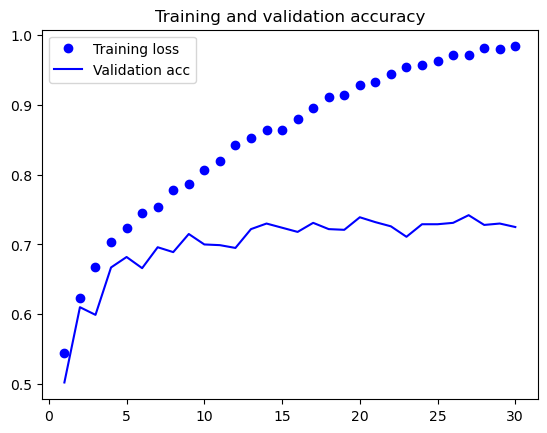

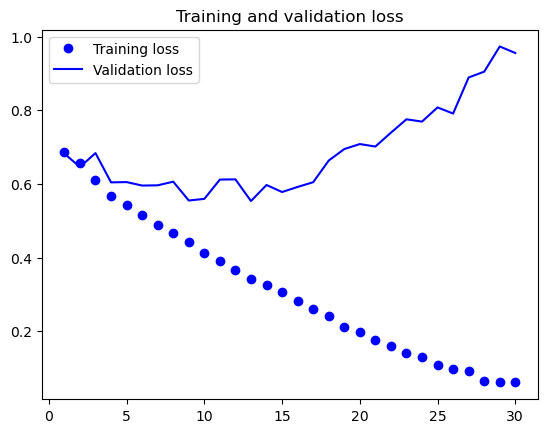

In [72]:
# § 代碼清單 5-10 繪製訓練過程中的損失曲線和精度曲線
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [73]:
#--- TEST h5 document --
import h5py

f = h5py.File('/home/earvin/workspaces/GithubProjects/tensorflow/scripts/cats_and_dogs_small_1.h5','r')
f.keys() #可以查看所有的主键
print([key for key in f.keys()])

['model_weights', 'optimizer_weights']


In [74]:
from keras.models import load_model

# 刪除既有模型變數
#del model 

# 載入模型
model = load_model('cats_and_dogs_small_1.h5')

In [75]:
# Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

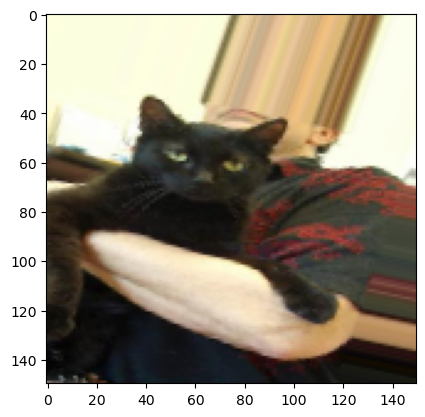

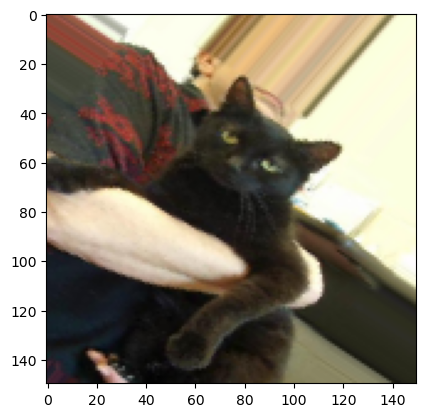

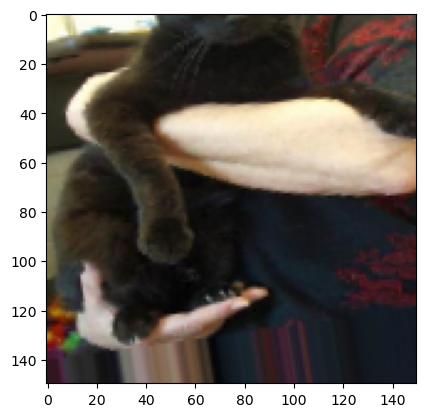

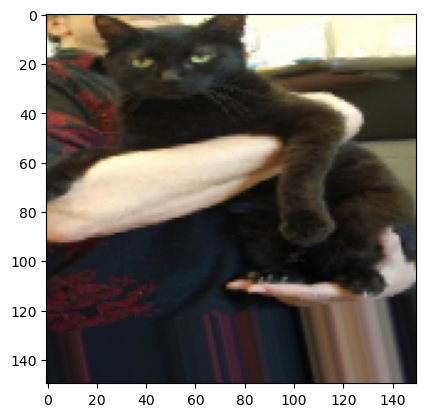

In [76]:
# Listing 5.12 Displaying some randomly augmented training images
# 2024.12.24 要換別的模組；原模組應已不支援
# from keras.preprocessing import image
from keras.utils import image_utils

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[5]
img = image_utils.load_img(img_path, target_size=(150, 150))
x = image_utils.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image_utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [77]:
# Listing 5.13 Defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [78]:
print(train_dir)

/home/earvin/workspaces/datasets/cats_and_dogs_small/train


In [85]:
# Listing 5.14 Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# 2023.12.19 hpnb好像跑不完；用ai-pc試跑看看~~
"""
Ref Addr : https://cloud.tencent.com/developer/article/1725310
generator: 
一個生成器，或一個Sequence (keras.utils.Sequence) 物件的實例， 以在使用多進程時避免資料的重複。
生成器的輸出應該為以下之一：
一個(inputs, targets) 元組 / 一個(inputs, targets, sample_weights) 元組。
steps_per_epoch: 
在聲明一個epoch 完成並開始下一個epoch 之前從generator產生的總步數（批次樣本）。
它通常應該等於你的資料集的樣本數量除以批量大小。對於Sequence，它是可選的：
如果未指定，則將使用len(generator)作為步數。
epochs: 
整數。訓練模型的迭代總輪數。
一個epoch 是對所提供的整個資料的一輪迭代，如steps_per_epoch 所定義。
注意，與initial_epoch 一起使用，epoch 應被理解為“最後一輪”。
模型沒有經歷由epochs 給出的多次迭代的訓練，而僅僅是直到達到索引epoch 的輪次。
verbose: 0, 1 或2。日誌顯示模式。0 = 安靜模式, 1 = 進度條, 2 = 每輪一行。
callbacks: keras.callbacks.Callback 實例的列表。在訓練時呼叫的一系列回調函數。
validation_data:
驗證資料的生成器或Sequence實例
一個(inputs, targets) 元組 / 一個(inputs, targets, sample_weights) 元組。
在每個epoch 結束時評估損失和任何模型指標。該模型不會對此資料進行訓練。
validation_steps: 
僅當validation_data 是一個生成器時才可用。在停止前generator 產生的總步數（樣本批數）。
對於Sequence，它是可選的：如果未指定，則將使用len(generator) 作為步數。
class_weight: 
可選的將類別索引（整數）對應到權重（浮點）值的字典，用於加權損失函數（僅在訓練期間）。
這可以用來告訴模型「更關注」來自代表性不足的類別的樣本。
max_queue_size: 整數。生成器隊列的最大尺寸。如未指定，max_queue_size 將預設為10。
workers: 整數。使用的最大進程數量，如果使用基於進程的多執行緒。如未指定，workers 將預設為1。如果為0，則會在主執行緒上執行生成器。
use_multiprocessing: 布林值。如果True，則使用基於行程的多執行緒。如未指定， use_multiprocessing 將預設為False。請注意，由於此實作依賴於多進程，所以不應將不可傳遞的參數傳遞給生成器，因為它們不能輕易地傳遞給子進程。
shuffle: 是否在每輪迭代之前打亂batch 的順序。只能與Sequence (keras.utils.Sequence) 實例同用。
initial_epoch: 開始訓練的輪次（有助於恢復先前的訓練）。
"""

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/80
  1/100 [..............................] - ETA: 7s - loss: 0.2687 - acc: 0.9000

/tmp/ipykernel_6182/4237196551.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 8s 77ms/step - loss: 0.3668 - acc: 0.8485 - val_loss: 0.4101 - val_acc: 0.8310
Epoch 2/80
100/100 [==============================] - 8s 78ms/step - loss: 0.3613 - acc: 0.8355 - val_loss: 0.3952 - val_acc: 0.8280
Epoch 3/80
100/100 [==============================] - 8s 77ms/step - loss: 0.3665 - acc: 0.8300 - val_loss: 0.4112 - val_acc: 0.8160
Epoch 4/80
100/100 [==============================] - 8s 77ms/step - loss: 0.3584 - acc: 0.8395 - val_loss: 0.4150 - val_acc: 0.8230
Epoch 5/80
100/100 [==============================] - 8s 77ms/step - loss: 0.3442 - acc: 0.8455 - val_loss: 0.4075 - val_acc: 0.8190
Epoch 6/80
100/100 [==============================] - 8s 77ms/step - loss: 0.3612 - acc: 0.8380 - val_loss: 0.3806 - val_acc: 0.8400
Epoch 7/80
100/100 [==============================] - 8s 77ms/step - loss: 0.3657 - acc: 0.8380 - val_loss: 0.4323 - val_acc: 0.8060
Epoch 8/80
100/100 [==============================] - 8s 77ms/step - loss: 0.360

100/100 [==============================] - 8s 77ms/step - loss: 0.2899 - acc: 0.8835 - val_loss: 0.4053 - val_acc: 0.8440
Epoch 63/80
100/100 [==============================] - 8s 77ms/step - loss: 0.2939 - acc: 0.8815 - val_loss: 0.4848 - val_acc: 0.8010
Epoch 64/80
100/100 [==============================] - 8s 77ms/step - loss: 0.2978 - acc: 0.8775 - val_loss: 0.4088 - val_acc: 0.8570
Epoch 65/80
100/100 [==============================] - 8s 77ms/step - loss: 0.2851 - acc: 0.8805 - val_loss: 0.4145 - val_acc: 0.8510
Epoch 66/80
100/100 [==============================] - 8s 77ms/step - loss: 0.2707 - acc: 0.8920 - val_loss: 0.4178 - val_acc: 0.8480
Epoch 67/80
100/100 [==============================] - 8s 77ms/step - loss: 0.2782 - acc: 0.8840 - val_loss: 0.4504 - val_acc: 0.8370
Epoch 68/80
100/100 [==============================] - 8s 77ms/step - loss: 0.2879 - acc: 0.8775 - val_loss: 0.4147 - val_acc: 0.8530
Epoch 69/80
100/100 [==============================] - 8s 77ms/step - loss

In [42]:
# Listing 5.15 Saving the model
model.save('cats_and_dogs_small_2.h5')

In [43]:
# Listing 5.16 Instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 81s 1us/step


In [44]:
# Test
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [45]:
# Listing 5.17 Extracting features using the pretrained convolutional base
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
# 2023.12.20 This cmd is error
base_dir = '/home/earvin/workspaces/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,target_size=(150, 150),
        batch_size=batch_size,class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * bath_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


NameError: name 'bath_size' is not defined

In [44]:
# Listing 5.18 Defining and training the densely connected classifier
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=30,
    batch_size=20,validation_data=(validation_features, validation_labels))


Epoch 1/30


ValueError: in user code:

    /home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 8192 but received input with shape (20, 4, 4, 512)


In [ ]:
# Listing 5.19 Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Listing 5.20 Adding a densely connected classifier on top of the convolutional base
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Test
model.summary()


In [ ]:
# Listing 5.21 Training the model end to end with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
    rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
    shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,
                              validation_data=validation_generator,validation_steps=50)